In [1]:
# System
import os

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Data
import numpy as np
import pandas as pd

# View
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# ML Models
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Utilities Files
def read_csv(name: str, index_label='id') -> pd.DataFrame:
    return pd.read_csv('../data/' + name + '.csv', index_col=index_label)


def save_csv(df: pd.DataFrame, name: str, index_label='id'):
    df.to_csv('../data/' + name + '.csv', index_label=index_label)

def show_image(name: str):
    return Image(filename= '../images/' + name + '.png')

In [3]:
# Development Flags
SHOW_IN_RELEASE = False
SHOW_IN_DEVELOPMENT = True

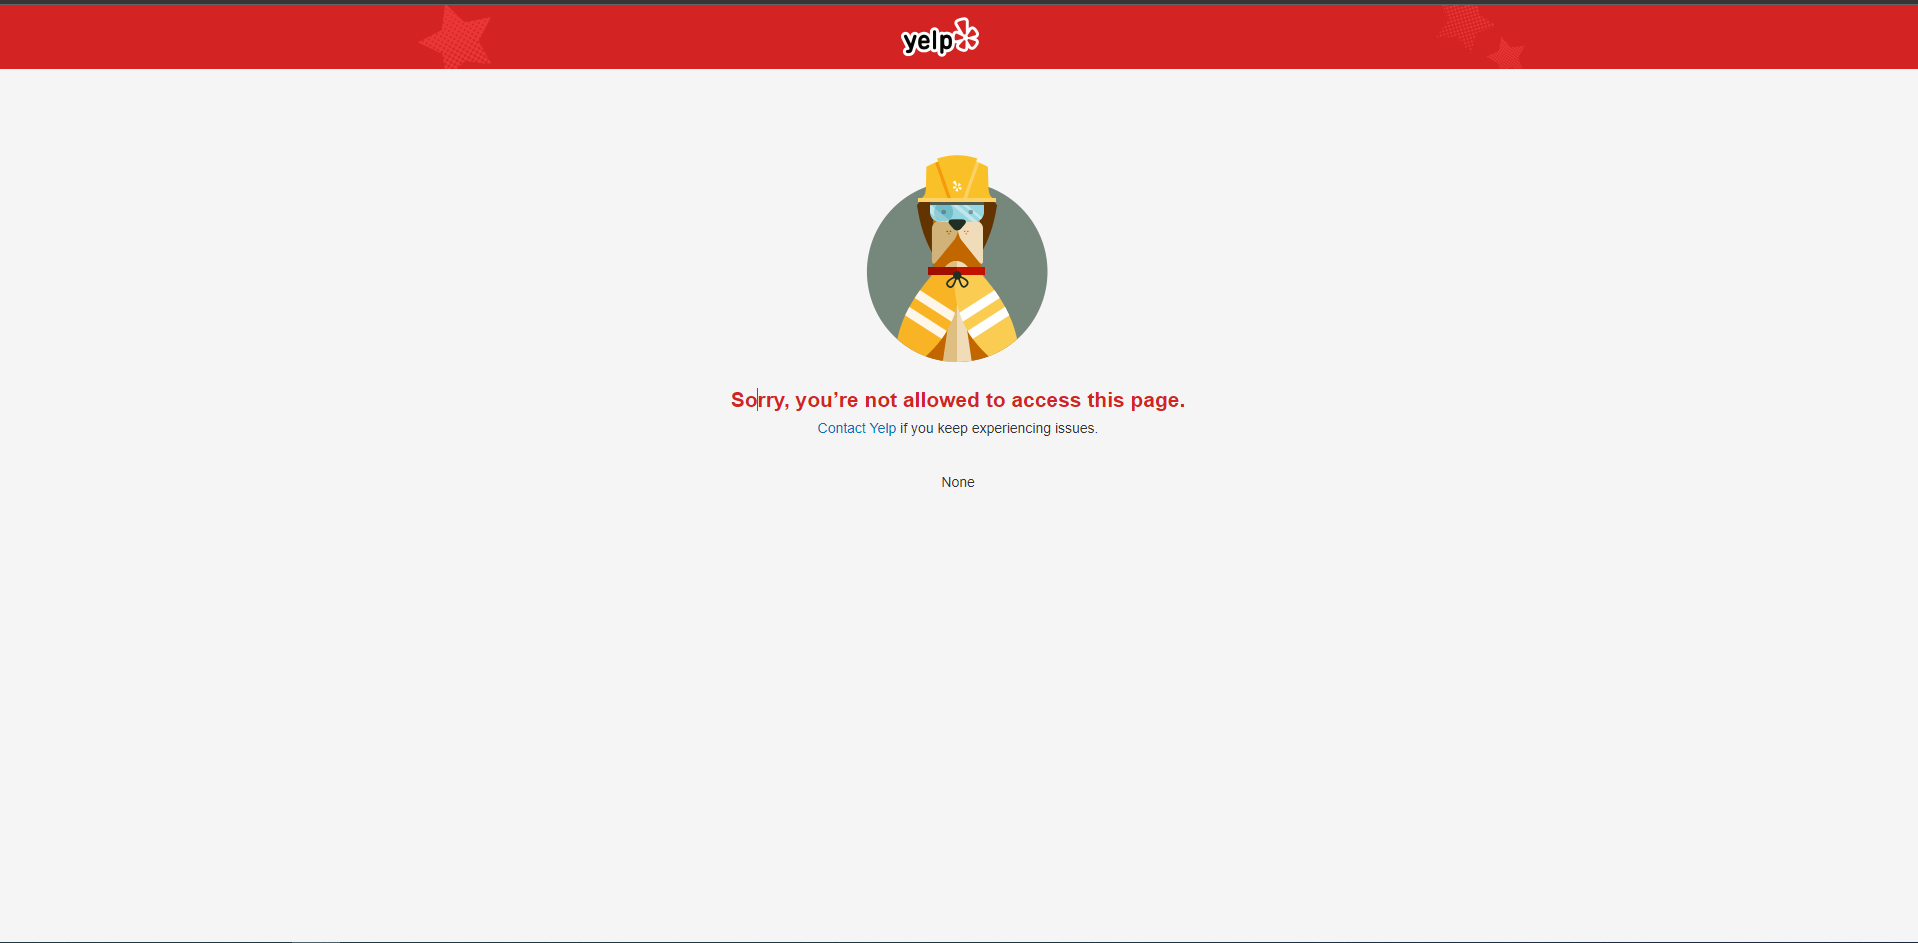

In [4]:
show_image('Sorry')

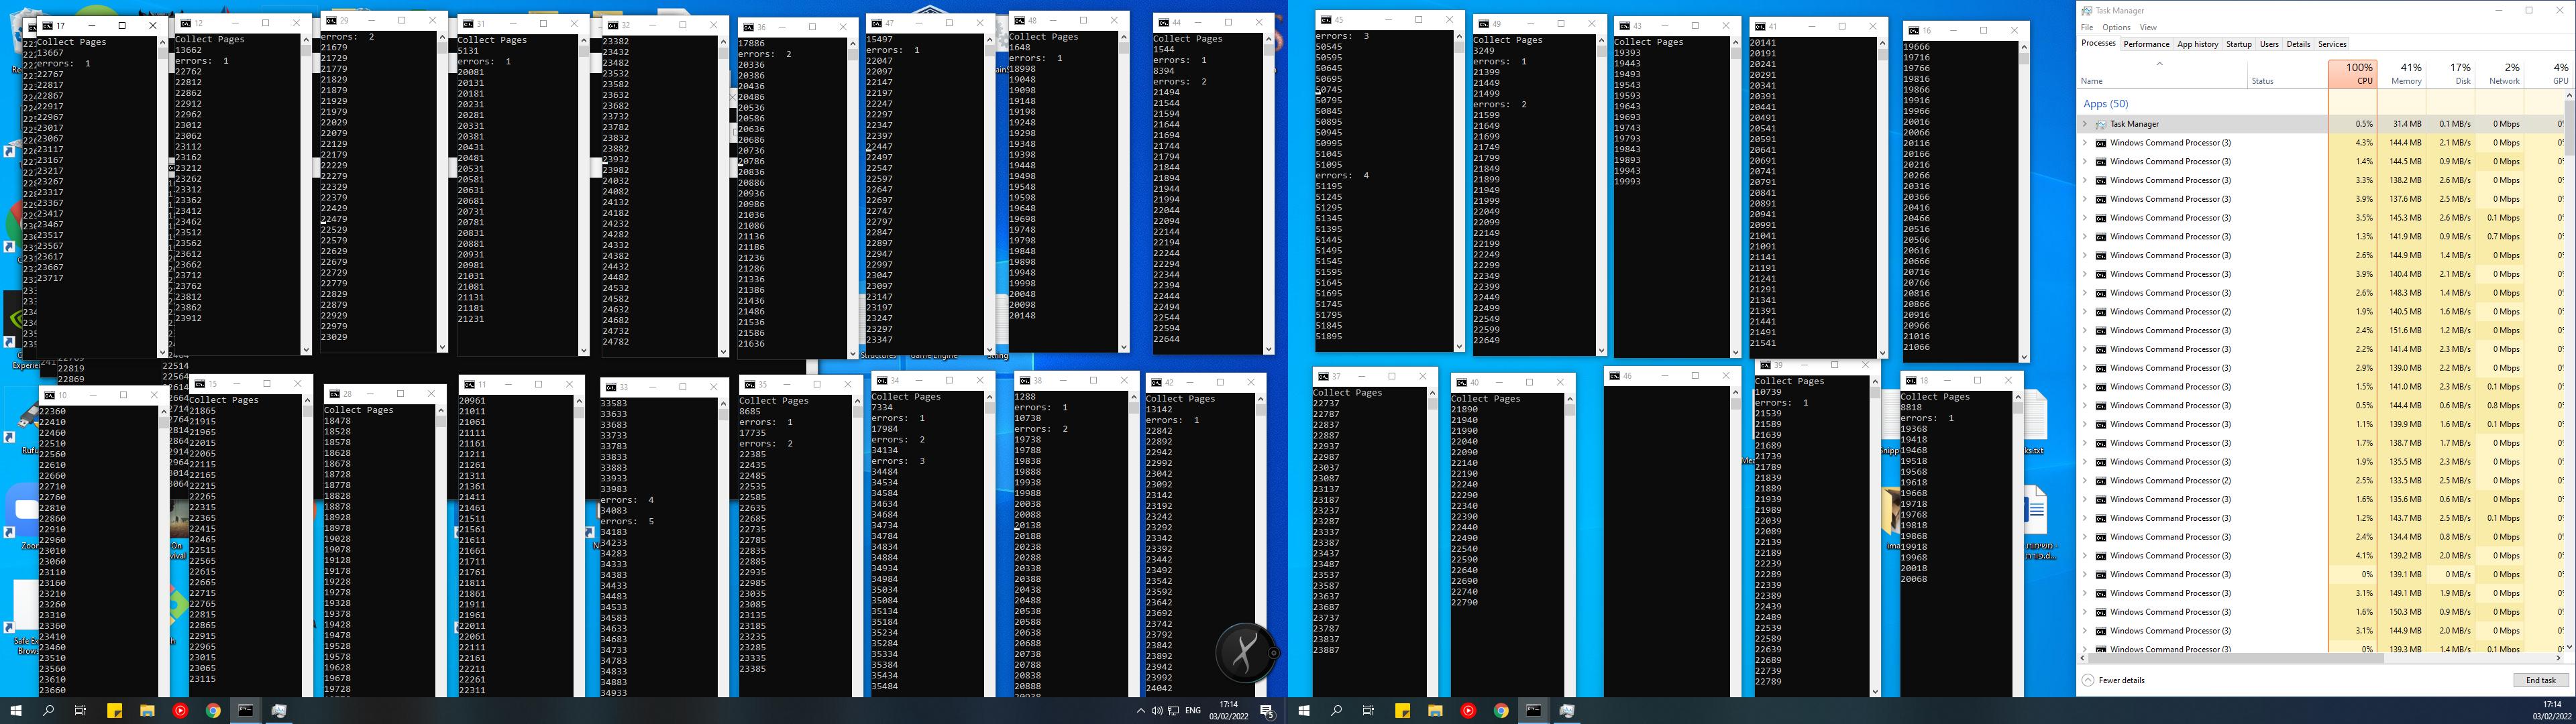

In [5]:
show_image('Data_Collectors')

In [6]:
df_original = read_csv('businesses')
df_original = df_original.head(5000)

df = df_original.copy()

df.drop(["Url", "Name", "ExpensiveLevel", "SubCategories", "AttributesHas"], axis=1, inplace=True)

In [7]:
Y = target = df["HasExpensiveLevel"]
X = data = df.drop(["HasExpensiveLevel"], axis=1)
x_train, x_finale_test, y_train, y_finale_test = train_test_split(X, Y, test_size=0.03, random_state=69)

In [8]:
df = df_train = pd.concat([y_train, x_train], axis=1)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
target_column = "HasExpensiveLevel"

first_columns=[
    'Claimed', 'HasWebsite',
    'Stars', 'Reviews', 'Photos',
    'SubCategoriesCount', 'AttributesCount',
    'QuestionsCount',
    'WeeklyHours', 'WeeklyBreaks', 'WeeklyDays',
]

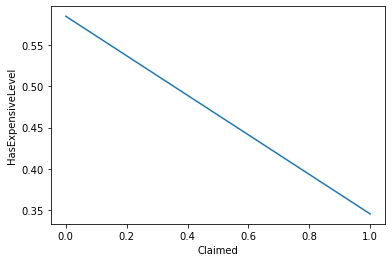

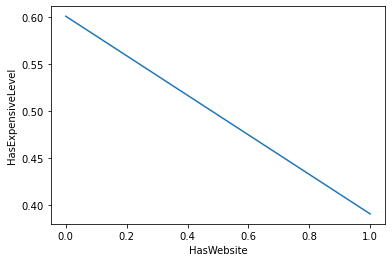

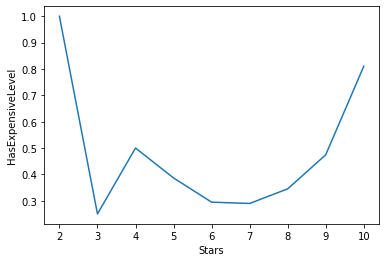

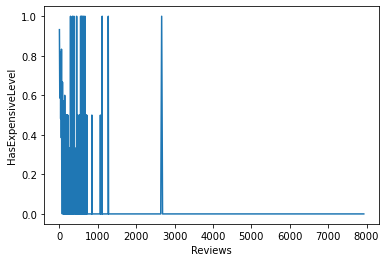

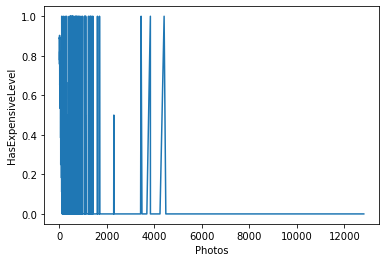

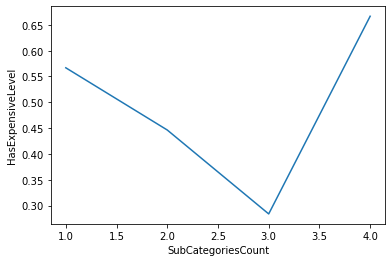

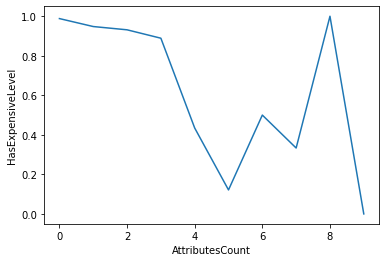

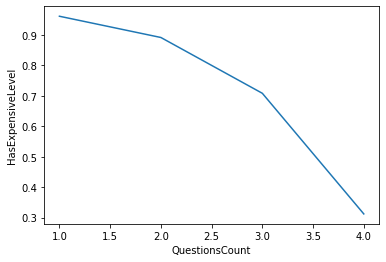

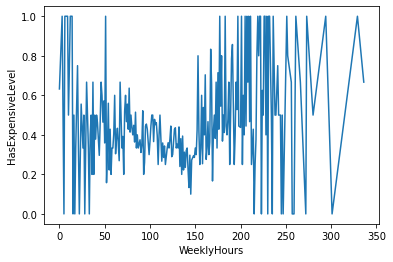

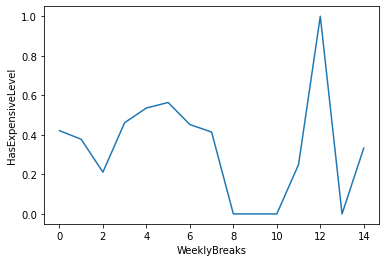

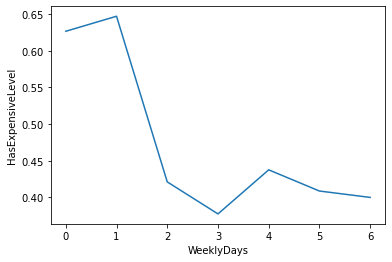

In [11]:
# Shows the average of "Has Expensive Level" for every column by value
# Average of "Has Expensive Level" symbolizes how likely it is to have expensive level

if SHOW_IN_DEVELOPMENT:
    for column in first_columns:
        mean_df = df[[target_column, column]].groupby([column]).mean()
        plt.plot(mean_df.index, mean_df[target_column].values)
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.show()

In [12]:
df[first_columns + [target_column]].describe()

,Claimed,HasWebsite,Stars,Reviews,Photos,SubCategoriesCount,AttributesCount,QuestionsCount,WeeklyHours,WeeklyBreaks,WeeklyDays,HasExpensiveLevel
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,0.661237,0.829897,8.327423,262.094845,330.848247,2.040619,3.924124,3.639175,110.354639,0.673196,5.051546,0.426598
std,0.473338,0.375762,0.998458,551.110904,757.489339,0.827577,1.010573,0.720692,57.693646,1.834289,1.820073,0.494634
min,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.000000,14.000000,25.000000,1.000000,4.000000,4.000000,73.000000,0.000000,5.000000,0.000000
50%,1.000000,1.000000,8.000000,68.000000,86.000000,2.000000,4.000000,4.000000,116.000000,0.000000,6.000000,0.000000
75%,1.000000,1.000000,9.000000,257.750000,298.750000,3.000000,4.000000,4.000000,150.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,10.000000,7928.000000,12812.000000,4.000000,9.000000,4.000000,336.000000,14.000000,6.000000,1.000000


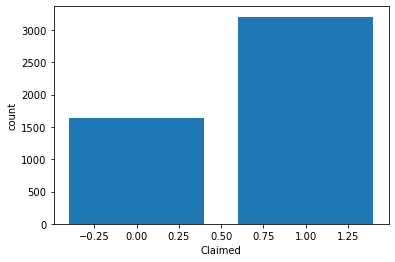

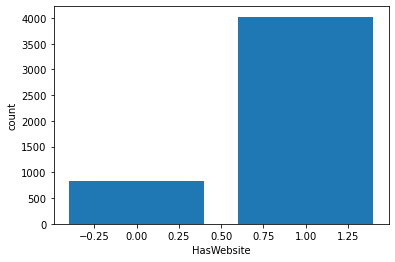

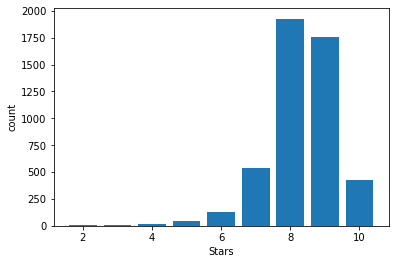

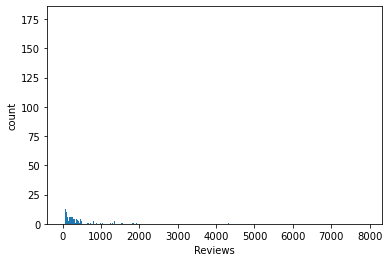

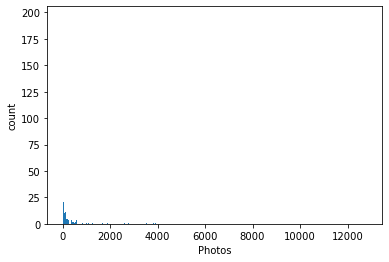

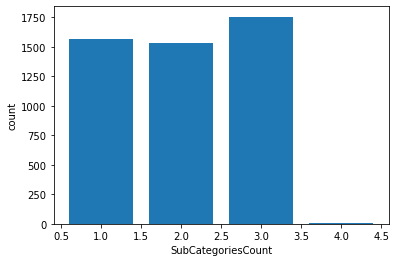

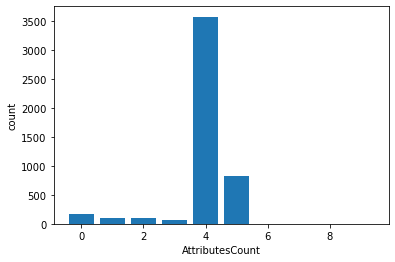

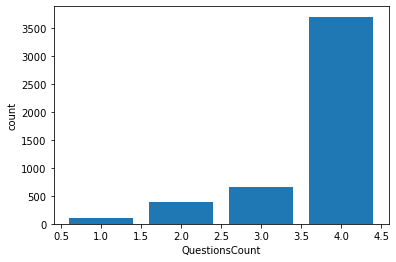

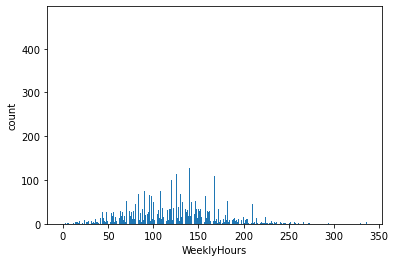

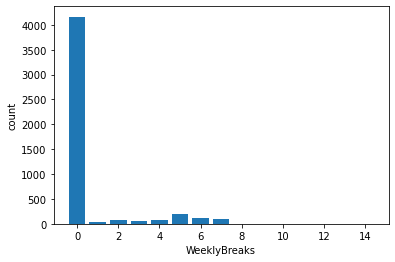

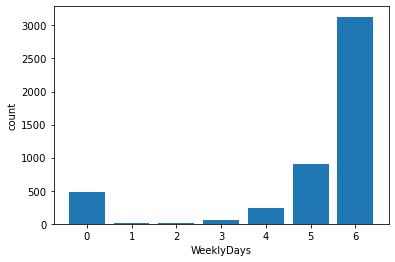

In [13]:
# Shows how much data we have for each value in each feature

if SHOW_IN_DEVELOPMENT:
    for column in first_columns:
        count_df = df[[target_column, column]].groupby([column]).count()
        plt.bar(count_df.index, count_df[target_column].values)
        plt.xlabel(column)
        plt.ylabel("count")
        plt.show()

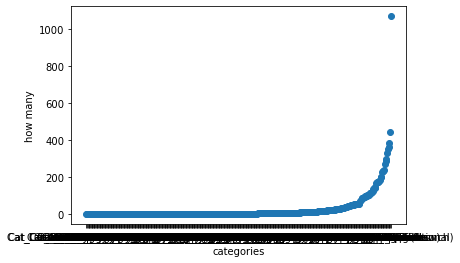

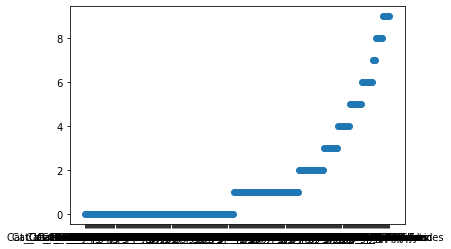

In [14]:
if SHOW_IN_DEVELOPMENT:
    column_values = df.columns.map(lambda x: x.startswith("Cat_"))
    cat_df = df.loc[:, column_values]
    categ = cat_df.sum().sort_values()
    plt.scatter(categ.index, categ.values)
    plt.xlabel("categories")
    plt.ylabel("how many")
    plt.show()
    plt.scatter(categ.head(300).index, categ.head(300).values)

In [15]:
x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_train, y_train, random_state=42)

In [16]:
# Create a Simple model base KNN

knn = KNeighborsClassifier()

knn.fit(x_sub_train, y_sub_train)

score = knn.score(x_sub_test, y_sub_test)
print("Score: ", score)

Score:  0.7732893652102226


In [17]:
# Get the minimum score

dummy_modal = DummyClassifier()

dummy_modal.fit(x_sub_train, y_sub_train)

score = dummy_modal.score(x_sub_test, y_sub_test)
print("Dummy Modal Score: ", score)

Dummy Modal Score:  0.5787304204451772


In [18]:
df_models = pd.DataFrame({
    'Name': [],
    'Score': []
})

def try_multi_models(models):
    global x_sub_train, y_sub_train, x_sub_test, y_sub_test
    global df_models
    
    df_models_add = pd.DataFrame({
    'Name': np.full(len(models), None),
    'Score': np.full(len(models), None)
    })
        
    i = 0
    for model in models:
        df_models_add.at[i, 'Name'] = model['name']
        try:
            model['model'].fit(x_sub_train, y_sub_train)
            
            score = model['model'].score(x_sub_test, y_sub_test)
            df_models_add.at[i, 'Score'] = score
            print(model['name'] + " Score: ", score)
        except:
            print(model['name'] + " Failed!")
        
        i += 1
    
    df_models = pd.concat([df_models, df_models_add])
    df_models.reset_index(drop=True, inplace=True)

In [19]:
# First tring

models = [
    {
        'name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    }, {
        'name': 'LogisticRegression',
        'model': LogisticRegression()
    }, {
        'name': 'Lasso',
        'model': Lasso()
    }, {
        'name': 'SVC',
        'model': SVC()
    }, {
        'name': 'LinearSVC',
        'model': LinearSVC()
    }, {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    }
]

try_multi_models(models)

KNeighborsClassifier Score:  0.7732893652102226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Score:  0.8260511129431163
Lasso Score:  0.11919859907800745
SVC Score:  0.7906018136850783


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC Score:  0.7798845836768343
RandomForestClassifier Score:  0.8870568837592745


In [20]:
# Try svm models

models = [
    {
        'name': 'OneClassSVM',
        'model': OneClassSVM(gamma='auto')
    }, {
        'name': 'SVR',
        'model': SVR()
    }
]

try_multi_models(models)

OneClassSVM Failed!
SVR Score:  0.3558399882922145


In [21]:
# Try models like Random Forest

models = [
    {
        'name': 'RandomForestRegressor',
        'model': RandomForestRegressor()
    }
]

try_multi_models(models)

RandomForestRegressor Score:  0.6291081787568089


In [22]:
df_models

,Name,Score
0,KNeighborsClassifier,0.773289
1,LogisticRegression,0.826051
2,Lasso,0.119199
3,SVC,0.790602
4,LinearSVC,0.779885
5,RandomForestClassifier,0.887057
6,OneClassSVM,None
7,SVR,0.35584
8,RandomForestRegressor,0.629108


In [23]:
df_models.sort_values('Score', ascending=False, inplace=True)
df_models

,Name,Score
5,RandomForestClassifier,0.887057
1,LogisticRegression,0.826051
3,SVC,0.790602
4,LinearSVC,0.779885
0,KNeighborsClassifier,0.773289
8,RandomForestRegressor,0.629108
7,SVR,0.35584
2,Lasso,0.119199
6,OneClassSVM,None


In [24]:
# The bast score comes form Random Forest Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
# Learning about VotingClassifier

vs = VotingClassifier(estimators=[
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression())
])

vs.fit(x_sub_train, y_sub_train)

score = vs.score(x_sub_test, y_sub_test)
print("Voting Classifier Score: ", score)

Voting Classifier Score:  0.8565539983511954


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [200, 500,300,400,600,700],
    
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

grid_search.fit(x_sub_train, y_sub_train)

print(grid_search.best_params_)

score = grid_search.score(x_sub_test, y_sub_test)
print("Score: ", score)

res_as_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
res_as_df

{'n_estimators': 700}
Score:  0.886232481450948


,n_estimators,Accuracy
0,200,0.857580
1,500,0.859505
2,300,0.859779
3,400,0.860054
4,600,0.859780
5,700,0.860056
